### Install Required Libraries

In [2]:
# !pip install python-dotenv langchain-together langchain


### Configure the API Key


In [3]:
#@title Enter Your Together and Hugging Face API Keys
TOGETHER_API_KEY = ""  # @param {type:"string"}
HUGGING_FACE_API_KEY = ""  # @param {type:"string"}

if TOGETHER_API_KEY == "your_together_api_key_here":
    raise ValueError("Please enter your Together API key in the field above.")
if HUGGING_FACE_API_KEY == "your_hugging_face_api_key_here":
    raise ValueError("Please enter your Hugging Face API key in the field above.")

print("API keys have been entered successfully.")



API keys have been entered successfully.


### Example 1: Simple Conversation


### Import the Necessary Classes

We import `ChatTogether` and `Together` from the `langchain_together` library. These classes are essential for interacting with the Together API and using its language models.

### Configuring the Language Model

The `Together` class is instantiated with a specific model and your API key. In this example, we use the `meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo` model. Replace `TOGETHER_API_KEY` with your actual API key, which you will input earlier in the notebook.

### Invoking the Model

A prompt is defined to request information from the model. In this example, the prompt is: "Provide a short and concise description of Shiraz city in Iran."

The `invoke` method is used to send the prompt to the model and retrieve the response. You can adjust parameters like `max_tokens` and `temperature` to control the length and creativity of the response, respectively.

#### Parameters

- `max_tokens`: This parameter controls the maximum number of tokens (words or parts of words) that the model can generate in the response. Setting this to a higher value allows for longer responses.
  
- `temperature`: This parameter controls the creativity of the response. A lower temperature (closer to 0) makes the model's output more focused and deterministic, while a higher temperature (closer to 1) makes the output more diverse and creative.


In [4]:
from langchain_together import ChatTogether, Together

# Alternatively, if you're using a code-specific model
llm = Together(
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    together_api_key=TOGETHER_API_KEY
)

# Invoke the model directly
prompt = "Provide a short and concise description of Shiraz city in Iran."

code_response = llm.invoke(prompt,max_tokens=100,temperature=0.7)

# Print the result
print(code_response)




/usr/local/lib/python3.10/dist-packages/langchain_together/llms.py:93: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


 Shiraz city is the capital of Fars province in Iran and a popular tourism destination due to its rich history, cultural heritage, and natural beauty. It is known for its ancient ruins, mosques, and gardens, including the famous Bagh-e Jahan Nama and Bagh-e Eram botanical gardens. Shiraz is also famous for its delicious local cuisine, which is a combination of Persian and Arabic flavors. The city is home to many historical sites, including the Arg- e Karim Khan


### Example 2: Simple Conversation with Defined Role

In [ ]:
from langchain_together import ChatTogether, Together
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Initialize ChatTogether with your model choice
chat = ChatTogether(
    together_api_key=TOGETHER_API_KEY,
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"
)

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a professional historian and cultural expert."),
    ("user", "{input}")
])

# Create an LLMChain instance
chain = LLMChain(llm=chat, prompt=prompt)

# Invoke the chain with user input
response = chain.invoke({"input": "Tell me about Shiraz briefly."})


# Print the result
print(response['text'])


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Shiraz, also known as Fars, is a city with a rich history and cultural significance in southwestern Iran. Founded in the 6th century BC by the ancient Persians, it has been a major urban center for over 2,500 years. Here's a brief overview:

**Ancient Period**: Shiraz was a major city in the Achaemenid Empire, the Sassanian Empire, and the Islamic Caliphate. Its strategic location made it a crucial crossroads for trade and cultural exchange between East and West.

**Cultural Significance**: Shiraz is famous for its poetry, music, and literary heritage. The city is the birthplace of the celebrated Persian poet Hafez, whose mystical and romantic poetry is still widely read and recited today. The city is also known for its beautiful gardens, which are an integral part of Persian culture.

**Art and Architecture**: Shiraz is home to numerous architectural wonders, including the Arg-e Karim Khan (a 18th-century citadel), the Vakil Mosque, and the Khan-e Zand (a historic palace complex). The

### Can we ask in other languages like Farsi?

In [ ]:
# Invoke the chain with user input
response = chain.invoke({"input": "برای من از تهران صحبت کن به طور خلاصه"})


# Print the result
print(response['text'])

تهران! شهر زیبای ایران که تاریخ و فرهنگ غنی دارد. در مرکز ایران واقع شده، تهران به عنوان مرکز سیاسی، اقتصادی و فرهنگی ایران شناخته می‌شود. این شهر از نظر تاریخی و فرهنگی بسیار غنی است و در حال رشد و توسعه است. از اماکن دیدنی تهران می‌توان به مقبره فردوسی، کتابخانه ملی ایران، موزه هنرهای معاصر تهران و بازار تهران اشاره کرد.


### Example 3: Simple Image Generation from Text Prompt

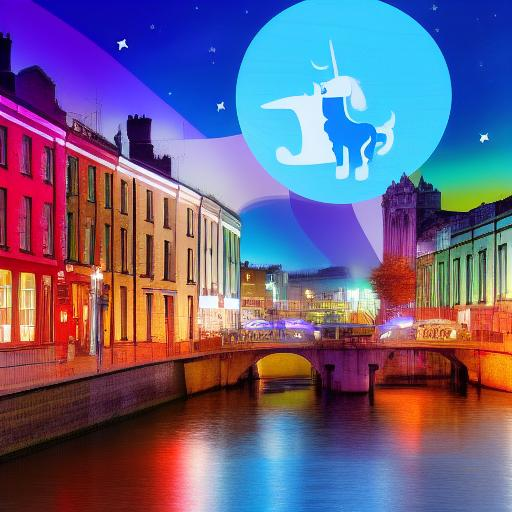

In [ ]:
import requests
from io import BytesIO
import IPython.display as display
from PIL import Image

# Hugging Face API URL
api_url = "https://api-inference.huggingface.co/models/CompVis/stable-diffusion-v1-4"


headers = {
    "Authorization": f"Bearer {HUGGING_FACE_API_KEY}"
}

prompt = "Create me an image of Dublin in Unicorn theme"

# Generate image from text prompt using Hugging Face API
response = requests.post(api_url, headers=headers, json={"inputs": prompt})

# Handle response
if response.status_code == 200:
    image_bytes = response.content
    image = Image.open(BytesIO(image_bytes))
    display.display(image)
else:
    print("Error generating image:", response.text)


## Time for the first assignment

Generated Python Code for Plotting:
plt.hist([2.3373196846940214, 1.4304548663498402, -0.5654605285075537, -0.2693902011040902, -0.2806216171874692, -0.21019918514673672, -1.0361797201868796, 1.025658734228756, 0.19952941346891007, -0.17833992164433457, 1.2320725922072147, -1.0443099145469004, -0.04044932129991487, -0.5652833691860802, -0.961059746532634, 0.9907319041049207, -1.0441511996422235, -1.2007675173918935, -0.6014490860808432, -3.026201760794823, 0.6437285043128135, 1.5378943120968762, 1.509468902070367, -1.312079682491549, -1.6322850486784297, -0.28487260703650524, -0.4529075584304978, 0.18936410425449304, 0.6635376658588862, 1.1425416753513593, 0.6585545643979291, 0.40401129543530057, 0.5239206210246264, -0.5878136277120849, -1.4453492855756795, -1.2864561418531755, 0.09918295347576654, -1.4988434645632793, 0.07224200796528772, 0.8182813663017335, 0.372022430966677, -0.4547040282015291, 0.20292211785177908, -0.13262919391026162, -0.7614601223654787, -0.19166552947561794, 0.

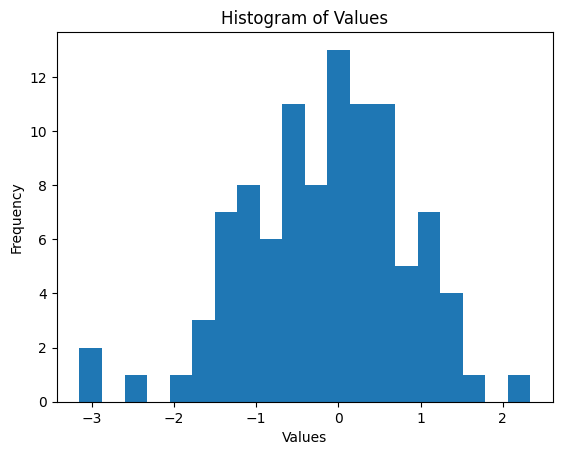

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_together import ChatTogether
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from numpy import random


# Initialize the Together model
llm = ChatTogether(
    model="meta-llama/Llama-3-70b-chat-hf",
    together_api_key=TOGETHER_API_KEY
)

# Define the role
define_role = "You are an expert Python programmer specializing in data visualization using matplotlib. Only return the code in a way that can be directly rendered in Python without import statements."

# Create a prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", f"{define_role}"),
    ("user", "Create a Python code to plot {plot_type} using the data {data}. Do not include import statements.")
])

# Chain the prompt template with the LLM
chain = prompt | llm

# Function to interact with the agent
def create_plot_code(chain, plot_type, data):
    # Format the input
    input_data = {
        "plot_type": plot_type,
        "data": data.tolist()  # Convert numpy array to list for serialization
    }

    # Invoke the chain with the formatted input
    response = chain.invoke(input_data)

    return response.content

# Example usage:
plot_type = "histogram"
data = random.normal(size=100)
generated_code = create_plot_code(chain, plot_type, data)
print("Generated Python Code for Plotting:")
print(generated_code)

# We expect the generated code not to include imports, so we safely execute it
exec(generated_code)

# Show the plot
plt.show()


## Time for the second assignment

Please refer to the Assignment Notebook to complete the assignment.

In [ ]:
from langchain_together import ChatTogether
from langchain_core.prompts import ChatPromptTemplate
import os


# Initialize the Together model
llm = ChatTogether(
    model="meta-llama/Llama-3-70b-chat-hf",
    together_api_key=TOGETHER_API_KEY
)

# Create a prompt template
define_role = "You are a knowledgeable geography and culture expert."

prompt = ChatPromptTemplate.from_messages([
    ("system", f"{define_role}"),
    ("user", "{input}")
])

# Chain the prompt template with the LLM
chain = prompt | llm

# Function to maintain conversation context and get responses
def converse_with_ai(chain, role, conversation_history, new_question):
    # Add the new question to the conversation history
    conversation_history.append({"role": "user", "content": new_question})

    # Create a formatted conversation history for the LLM
    formatted_history = [{"role": "system", "content": f"{role}"}] + conversation_history

    # Format the conversation history as a single input string
    input_text = "\n".join([f"{item['role']}: {item['content']}" for item in formatted_history if item['role'] != 'system'])

    # Invoke the chain with the formatted input
    response = chain.invoke({"input": input_text})

    # Add the response to the conversation history
    conversation_history.append({"role": "assistant", "content": response.content})

    return response.content, conversation_history, formatted_history

# Initialize the conversation history
conversation_history = []

# Example usage:
first_question = "What is the capital of Iran?"
response, conversation_history, formatted_history = converse_with_ai(chain, define_role, conversation_history, first_question)
print("formatted_history:", formatted_history)
print("AI-1:", response)
print("conversation_history:", conversation_history)

print("--------------------------------------------------------")

# Second question based on the first response
second_question = "Can you tell me more about it?"
response, conversation_history, formatted_history = converse_with_ai(chain, define_role, conversation_history, second_question)
print("formatted_history:", formatted_history)
print("AI-2:", response)
print("conversation_history:", conversation_history)

print("--------------------------------------------------------")

# Continue the conversation as needed
third_question = "What is the population of it?"
response, conversation_history, formatted_history = converse_with_ai(chain, define_role, conversation_history, third_question)
print("formatted_history:", formatted_history)
print("AI-3:", response)
print("conversation_history:", conversation_history)


formatted_history: [{'role': 'system', 'content': 'You are a knowledgeable geography and culture expert.'}, {'role': 'user', 'content': 'What is the capital of Iran?'}]
AI-1: The capital of Iran is Tehran! Located in the northern part of the country, Tehran is a bustling metropolis with a rich history and culture, known for its beautiful mosques, palaces, and vibrant bazaars.
conversation_history: [{'role': 'user', 'content': 'What is the capital of Iran?'}, {'role': 'assistant', 'content': 'The capital of Iran is Tehran! Located in the northern part of the country, Tehran is a bustling metropolis with a rich history and culture, known for its beautiful mosques, palaces, and vibrant bazaars.'}]
--------------------------------------------------------
formatted_history: [{'role': 'system', 'content': 'You are a knowledgeable geography and culture expert.'}, {'role': 'user', 'content': 'What is the capital of Iran?'}, {'role': 'assistant', 'content': 'The capital of Iran is Tehran! Locat